### Breast cancer prediction using SVM
- This kernel is for practice purposes. DS/ML newbies may find this helpful :)
- Reference links are provided in the end section of this kernel.

## 1. Import all required libraries

In [177]:
#for loading data and for performing data analysis operations on it
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#for PCA (feature engineering)
from sklearn.decomposition import PCA

#for data scaling
from sklearn.preprocessing import StandardScaler

#for splitting dataset
from sklearn.model_selection import train_test_split

#for fitting SVM model
from sklearn.svm import SVC

#for displaying evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for file operations
import os

print("All required libraries loaded!")

All required libraries loaded!


## 2. Load the dataset

In [178]:
#check the files in the given input folder
print(os.listdir("../input/"))

['data.csv']


In [179]:
#load dataset into pandas dataframe
df = pd.read_csv("../input/data.csv")
df.shape

(569, 33)

## 3. Data exploration

In [180]:
#check the data types of all the attributes loaded into the dataframe
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [181]:
#see first few rows of the data loaded
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [182]:
#see last few rows of the data loaded
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**What are we trying to solve?**<br>
Using patients diagnosis data (***here it is data.csv***) we are trying to predict whether a patient has cancer or not.<br>

For predicting whether a patient has cancer or not we must separate out the attributes from the dataset into **predictors** and **target**. Additionally, we will also drop the attributes/columns which we will not be useful for predicting the target value.<br>

**What is the target attribute in this dataset?**<br>
'diagnosis' column which holds the value M/B is the target attribute because our aim is to predict whether a patient has cancer or not given the symptoms.

**What are the predictors in this dataset?**<br>
All attributes in this dataset except ***'id', 'diagnosis'*** are predictors. Let's see the usefulness of these predictors in further data analysis steps like - PCA, dimensionality reduction.

In [183]:
#loading the predictors into dataframe 'X'
#NOTE: we are not choosing columns - 'id', 'diagnosis', 'Unnamed:32'
X = df.iloc[:,2:32]
print(X.shape)
X.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [184]:
#loading target values into dataframe 'y'
y = df.diagnosis
print(y.shape)
y.head()

(569,)


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

- For model fitting we will need numerical data only, but here the 'diagnosis' data is not numerical.
- The categorical data has to be converted to numerical data.

Let's use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) pandas method for converting categorical data to numerical data.

In [185]:
#coverting categorical data to numerical data
y_num = pd.get_dummies(y)
y_num.tail()

,B,M
564,0,1
565,0,1
566,0,1
567,0,1
568,1,0


- As we in the above output [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) pandas method creates two numerical columns for categories - 'B', 'M'.
- The values under column 'M' are 0 and 1. 0 -> for not Malignant, 1 -> for Malignant.
- We are interested in finding out whether the patient has cancer or not hence let's use 'M' column only.

In [186]:
#use only one column for target value
y = y_num.M
print(y.shape)
y.tail()

(569,)


564    1
565    1
566    1
567    1
568    0
Name: M, dtype: uint8

### Check correlation among predictors

In [187]:
#call corr() on dataframe X
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


- It is difficult to identify the attributes which are strongly using the numerical data produced by **corr()** method, so let's use [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize the correlations among the attributes.

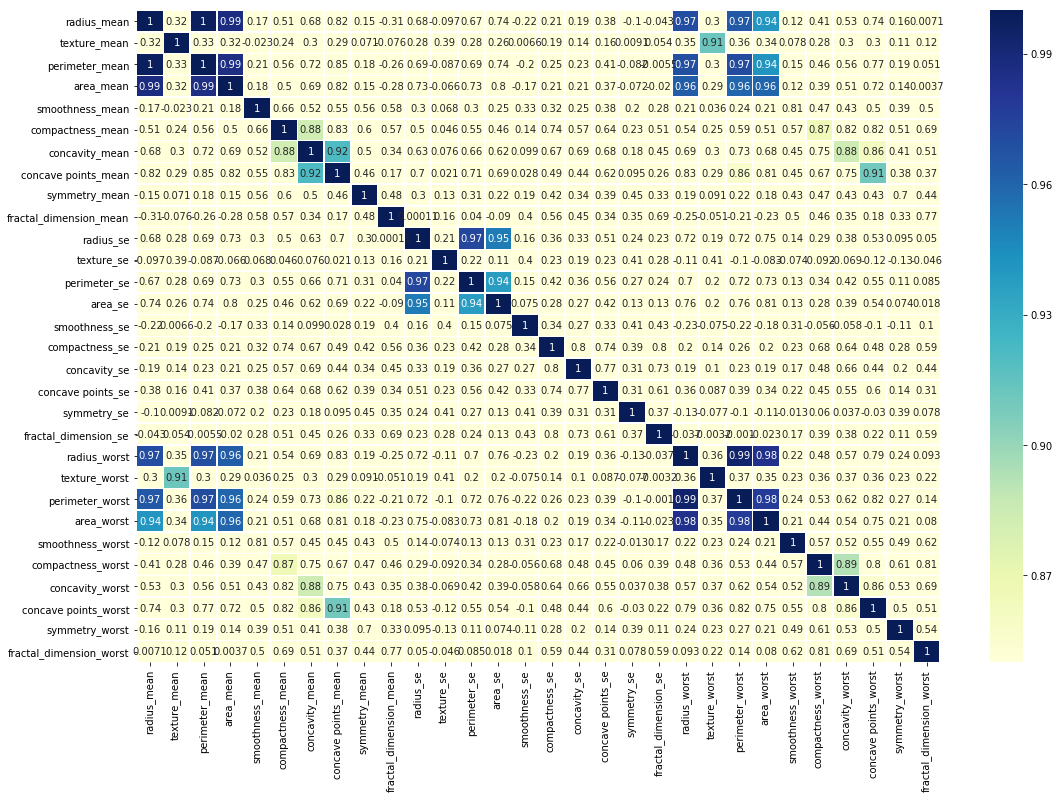

In [188]:
plt.figure(figsize=(18, 12))
sns.heatmap(X.corr(), vmin=0.85, vmax=1, annot=True, cmap='YlGnBu', linewidths=.5)

**What we can observe from the above correlations heatmap?**<br>
- It is observed that there are some attributes which are highly correlated with each other whereas other attributes are loosely correlated with each other.
- Attributes like 'radius_x' , 'perimeter_x' , 'area_x' are highly correlated because perimeter and area depend on radius, so we can use 'radius_x' and ignore perimeter, area attributes in our data analysis.

After observing the correlation heatmap we can say what attributes among the predictors will be useful for predictions and which can be ignored.

## 4. PCA (Principal component analysis)/Dimensionality reduction

- We have 30 columns/attributes in the predictors dataframe. Dealing with so many attributes becomes difficult because it is hard to visualize data in 30 different dimensions.
- The aim in this step is to reduce the attributes from 30 to ~10 without loosing the key components of the available data.

**What is PCA in a nutshell?**
- Identifying and choosing the principal components among the various components we have to predict an output efficiently.

The above explanation may seem very vague. I suggest reading this [blogpost on medium](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) which answers the fundamental questions about PCA.

In [189]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 11)


In [190]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892889


### Visualize data after PCA

In [191]:
#combine PCA data and target data

#1 set column names for the dataframe
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']

#target data
diag = df.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)

Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,8.0668,0.414765,-2.53807,-2.60801,-1.34449,1.43517,-1.71381,-0.491329,0.655096,0.544224,0.718321,M
1,0.106798,-2.76173,-0.141345,-1.39507,0.130814,0.0173621,-0.333451,-0.389474,-0.706687,0.114084,0.405121,M
2,4.3861,-1.96988,-0.226679,-1.1084,-0.700594,0.477506,0.287285,-0.0794344,-0.35264,-0.654396,-0.284427,M
3,10.6706,5.91486,-4.30283,1.99823,-1.8469,3.10173,-0.812473,-1.81333,1.33401,-0.454319,-1.4286,M
4,2.03748,-1.15466,0.905585,-3.34619,-0.640128,-1.33316,0.604286,-0.462435,-0.232974,0.37583,0.567374,M


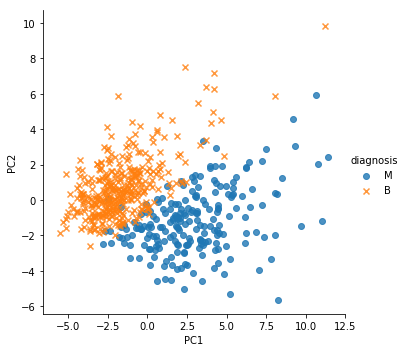

In [192]:
#visualize data
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False, markers=["o", "x"])
plt.show()

## 5. Split data for training and testing

In [193]:
X=(Xy.iloc[:,0:11]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (426, 11)
y_train shape  (426,)
X_test shape  (143, 11)
y_test shape  (143,)


## 6. SVM model fitting

In [194]:
#model fitting
svc = SVC()
svc.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [195]:
#predict values
y_pred_svc =svc.predict(X_test)
y_pred_svc.shape

(143,)

In [196]:
#print confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[90  0]
 [ 4 49]]


In [197]:
#print classification report
creport = classification_report(y_test, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



### References
- https://www.kaggle.com/saramille/bc-collinearity-and-dimensional-reduction
- https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic
- https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c